In [1]:
# Michael Wasserstein
# Plot_Synoptic_Analysis.py
# 7/18/2023
# Script takes in WRF 4 panel outputs and plots synoptic analysis

####### Usage #########
# Conda environment - py37
# python /uufs/chpc.utah.edu/common/home/u1371671/WRF/Plotting_Scripts/Plot_Synoptic_Analysis.py -r 2 -p 2
# -r represents the run number you want to plot



import wrf
from wrf import (getvar, interplevel, to_np, latlon_coords, get_cartopy,
                 cartopy_xlim, cartopy_ylim, ALL_TIMES)
from netCDF4 import Dataset
import matplotlib.pyplot as plt
#import proplot as pplt
import glob
import xarray
import metpy.calc as mpcalc
import matplotlib.gridspec as gridspec
from metpy.units import units
import os, sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u1371671/')
from map_script import *
import datetime
from scipy.ndimage import gaussian_filter
import pyart

######## User input arguments #############
# import argparse
# parser = argparse.ArgumentParser()

# parser.add_argument("-r", "--run", help="WRF run of interest")
# parser.add_argument("-p", "--path", help="Wrf path - where is data (1 or 2")


# args = parser.parse_args()

# # Get user inputs
# run = str(args.run)
# path = int(args.path)
# print('Plotting data for run', run)

run = '12'
path = 12
view = 'UT'

run_number = '{}'.format(run).zfill(2)


/uufs/chpc.utah.edu/common/home/u1371671/software/pkg/miniconda3/envs/py37/lib/python3.7/site-packages/gribapi/__init__.py:25: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.23.0
  "You are running version {}".format(min_recommended_version_str, __version__)



## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
# ---------------- END USER SPECIFIED VARIABLES ----------------

# IVT contour fill colors                                                                                                                                                                                                                                 
def ivtcfillcolors():                                                                                                                                                                                                                                     
    ivt_fill_colors = ['#3488c4',                                                                                                                                                                                                                         
                           '#68bca8',                                                                                                                                                                                                                                
                           '#b6ec8c',                                                                                                                                                                                                                                
                           '#ebf15e',
                           '#dfae31',
                           '#d06932',
                           '#be2b32',                                                                                                                                                                                                                                
                           '#950002',
                           '#750546',
                           '#45062b']                                                                                                                                                                                                                                 
    return ivt_fill_colors   

# Precip contour fill colors
def precipcfillcolors():
    precip_fill_colors = ['#3488c4',
                   '#68bca8',
                   '#b6ec8c',
                   '#ebf15e',
                   '#dfae31',
                   '#d06932',
                   '#be2b32',
                   '#950002']
    return precip_fill_colors

g = 9.80665 # m /s 

# paths for saving fig
working_dir = os.getcwd()


station = 'CLN'

In [3]:
########### End of user inputs ############

station_dicts = {'CLN' : [40.5763,-111.6383],
                'SLC' : [40.77,-111.95]}

lat_lon = station_dicts[station] # lat and lon of CLN


# paths for data
if path ==1:
    base_path = '/uufs/chpc.utah.edu/common/home/steenburgh-group12/michael/wrf/'
else:
    base_path = '/uufs/chpc.utah.edu/common/home/steenburgh-group12/michael/wrf{}/'.format(path)
WRF_path = base_path + 'wrf_runs/wrf_{}/run/'.format(run_number)
WPS_path = base_path + 'WPS/'

# paths for saving fig
working_dir = os.getcwd()
parent_dir = os.path.dirname(working_dir) 
if view == 'WE':
    Fig_dir = parent_dir + '/Figures_{}/wrf_{}/Synoptic_Scale_4_Panel/'.format(path,run_number)
elif view == 'UT':
    Fig_dir = parent_dir + '/Figures_{}/wrf_{}/Synoptic_Scale_4_Panel_zoom/'.format(path,run_number)
else:
    print('Please specify a correct view')
print(Fig_dir)
if os.path.exists(Fig_dir) == False:
    os.mkdir(Fig_dir)

GIF_dir = parent_dir + '/Figures_{}/wrf_{}/GIFS/'.format(path,run_number)


# load in all the wrf output data files
data_files_d03 = glob.glob(WRF_path + '*wrfout_d03*') # Domain 3
data_files_d04 = glob.glob(WRF_path + '*wrfout_d04*') # Domain 4

# Sort files
data_files_d03.sort()
data_files_d04.sort()

# extract the first and last times for the simulation as strings from the file names
start_time_str = data_files_d03[0][-19:]
end_time_str = data_files_d03[-1][-19:]

date_format = '%Y-%m-%d_%H:%M:%S' # format of the string

start_dt = datetime.datetime.strptime(start_time_str, date_format)
end_dt = datetime.datetime.strptime(end_time_str, date_format)

# User inputs - for what times do you want to plot the results (potentially start and end time of model run)
time_of_interest_list = pd.date_range(start = start_dt, end = end_dt, freq = '1H')

/uufs/chpc.utah.edu/common/home/u1371671/WRF/Figures_12/wrf_12/Synoptic_Scale_4_Panel_zoom/


# Plotting

/uufs/chpc.utah.edu/common/home/u1371671/software/pkg/miniconda3/envs/py37/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1508: UserWarning: The following kwargs were not used by contour: 'transform_first'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/uufs/chpc.utah.edu/common/home/u1371671/software/pkg/miniconda3/envs/py37/lib/python3.7/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/uufs/chpc.utah.edu/common/home/u1371671/software/pkg/miniconda3/envs/py37/lib/python3.7/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/uu

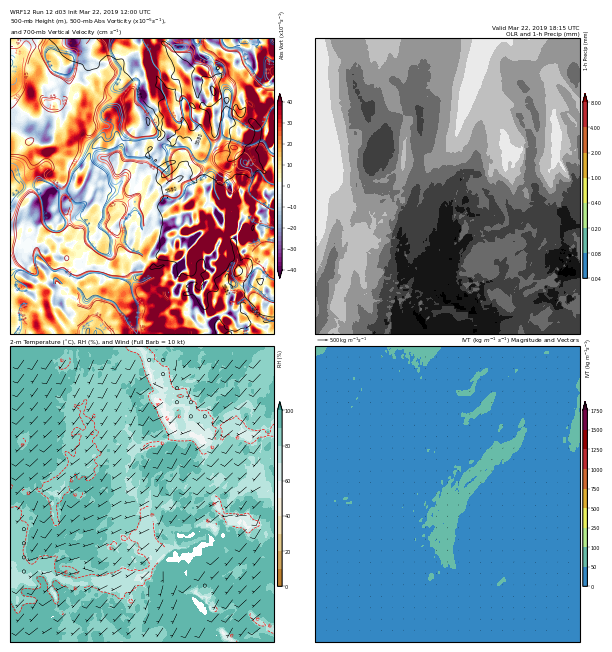

In [4]:
for ind, f in enumerate(data_files_d03[25:26]):
    
    wrfin_d03 = Dataset(f) # Extract the actual file
    wrfin_d04 = Dataset(data_files_d04[ind])
    time_of_interest = pd.to_datetime(getvar(wrfin_d03, 'Times').values)
    #time_of_interest = time_of_interest_list[ind]
    time_of_interest_str = datetime.datetime.strftime(time_of_interest, '%Y-%m-%d_%H:%M:%S')
    time_of_interest_save = datetime.datetime.strftime(time_of_interest, '%Y%m%d%H%M')

    
    # Stuff for boundaries
    geobounds = wrf.geo_bounds(wrfin=wrfin_d03)
    bottom_latitude_d03 = geobounds.bottom_left.lat
    left_longitude_d03 = geobounds.bottom_left.lon
    top_latitude_d03 = geobounds.top_right.lat
    right_longitude_d03 = geobounds.top_right.lon
    
    geobounds = wrf.geo_bounds(wrfin=wrfin_d04)
    bottom_latitude_d04 = geobounds.bottom_left.lat
    left_longitude_d04 = geobounds.bottom_left.lon
    top_latitude_d04 = geobounds.top_right.lat
    right_longitude_d04 = geobounds.top_right.lon

    wrflist = [Dataset(file) for file in data_files_d03]


    x_y = wrf.ll_to_xy(wrfin_d03, lat_lon[0], lat_lon[1]) # some interpolations for the xy of the data

    # User inputs
    init_time = wrfin_d03.SIMULATION_START_DATE
    init_time = datetime.datetime.strptime(init_time, '%Y-%m-%d_%H:%M:%S')
    init_time_str = datetime.datetime.strftime(init_time, '%b %-d, %Y %H:%M UTC')

    time_to_plot = time_of_interest
    valid_time_str = datetime.datetime.strftime(time_to_plot, '%b %-d, %Y %H:%M UTC')

    #%%time
    # Creating a simple test list with three timesteps
    # Extract the 'P' variable for all times
    tc = getvar(wrfin_d03, "tc", )
    td = getvar(wrfin_d03, "td", )
    p = getvar(wrfin_d03,"pressure",)
    ua = wrf.getvar(wrfin_d03,"ua", )
    va = wrf.getvar(wrfin_d03,"va")
    wa = wrf.getvar(wrfin_d03,"wa")
    rh = wrf.getvar(wrfin_d03,"rh",)
    terr = wrf.getvar(wrfin_d03, 'ter')
    rain = snow = wrf.getvar(wrflist, "RAINNC", timeidx=ALL_TIMES, method="cat") + wrf.getvar(wrflist, "RAINC", timeidx=ALL_TIMES, method="cat")
    mslp = wrf.getvar(wrfin_d03, 'slp')
    avo = getvar(wrfin_d03, "avo")
    z = getvar(wrfin_d03, "z", units="dm")
    OLR = getvar(wrfin_d03, 'OLR')
    T2 = getvar(wrfin_d03, 'T2') - 273.15 # convert from K to C

    q = mpcalc.specific_humidity_from_dewpoint(p * units.hPa, td * units.degC)


    # Compute IVT and IVT Vector
    q_times_u = q * ua
    q_times_v = q * va

    q_times_v['bottom_top'] = q_times_v['bottom_top'] * 1000 / g # times 1000 for unit conversion
    q_times_u['bottom_top'] = q_times_u['bottom_top'] * 1000 / g

    qu_int =  q_times_u.integrate('bottom_top')
    qv_int =  q_times_v.integrate('bottom_top')

    IVT = np.sqrt(qu_int ** 2 + qv_int ** 2)


    # Interpolate data for pressure levels
    # 700 mbar
    u_700 = gaussian_filter(interplevel(ua, p, 700), sigma = 2)
    v_700 = gaussian_filter(interplevel(va, p, 700), sigma = 2)
    tc_700 = gaussian_filter(interplevel(tc, p, 700), sigma = 2)
    rh_700 = interplevel(rh, p, 700)

    # 925 mbar
    #tc_925 = gaussian_filter(interplevel(tc, p, 925), sigma = 2)
    tc_2m = gaussian_filter(T2, sigma = 4)

    # 500 mbar
    z_500 = gaussian_filter(interplevel(z, p, 500), sigma = 2) * 10
    avo_500 = gaussian_filter(interplevel(avo, p, 500), sigma = 2)

    # 750 mbar
    w_750 = gaussian_filter(interplevel(wa, p, 700), sigma = 6) # Units of m / s

    # slp
    slp = gaussian_filter(mslp, sigma = 2)

    # Stuff for rain
    if ind > 0:
        rain_plot = rain[ind] - rain[ind-1]
    else:
        rain_plot = rain[ind]

    # Get the map projection information
    cart_proj = get_cartopy(rh_700)
    lati, long = latlon_coords(rh_700)
#     xlim = cartopy_xlim(rh_700)
#     ylim = cartopy_xlim(rh_700)
    xlim = [left_longitude_d03, right_longitude_d03]
    ylim = [bottom_latitude_d03, top_latitude_d03]


    # map settings
    zorder_bounds = 50
    plt.rcParams.update({'font.size': 3.5})
    datacrs = ccrs.PlateCarree()
    shrink = 0.6


    ########################################################################
    ########################## Plot Results ################################
    ########################################################################
    #---------- Plot 500-mb diagnostic upper left ----------

    # Set plot axes and figure extent
    fig,ax = plt.subplots(2, 2, figsize=(8, 8))
    ax = plt.subplot(221, projection=cart_proj)

    # Add geopolitical boundaries
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5, zorder = zorder_bounds)
    ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=0.25, zorder = zorder_bounds)
    ax.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=0.25, zorder = zorder_bounds)

    # Plot absolute vorticity (multiplying by 10^5)
    clevs_500_avor = list(range(-40, 42, 2))
    colors1 = plt.cm.YlOrRd(np.linspace(0, 1, 20))
    colors2 = plt.cm.BuPu(np.linspace(1, 0, 21))
    colors = np.vstack((colors2, (1, 1, 1, 1), colors1))

    # Plot 500 mbar absolute vorticity
    cf = ax.contourf(long, lati, avo_500, clevs_500_avor, colors=colors, extend='both', 
                     transform=datacrs, transform_first=True)
    cb = plt.colorbar(cf, pad=0.01, aspect=40, extend='both', shrink=shrink,)
    cb.ax.tick_params(length=2, width=.25, pad = 1)
    cb.set_label('Abs Vort (x10$^{-5}$$s^{-1}$)', labelpad=-14, y=1.4)

    #Plot 750-mb upward vertical velocity (red shades) 
    clevs_vv = [1.5,3.,4.5]
    cw = ax.contour(long, lati, w_750*100, clevs_vv, colors=['#fb6a4a','#de2d26','#a50f15'], linewidths=0.5,
                    transform=datacrs, transform_first=True)
    plt.clabel(cw, fmt='%1.1f')

    # Plot 750-mb downward vertical velocity (blue shades)
    clevs_vv = [-4.5,-3,-1.5]
    cw = ax.contour(long, lati, w_750*100, clevs_vv, colors=['#08519c','#3182bd','#6baed6'], linewidths=0.5,
                    transform=datacrs, transform_first=True)
    plt.clabel(cw, fmt='%1.1f')

    # Plot 500-mb geopotential height
    clevs_500_hght = np.arange(0, 8000, 30)
    cs = ax.contour(long, lati, z_500, clevs_500_hght, colors='black', linewidths=0.5,
                    transform=datacrs, transform_first=True)
    plt.clabel(cs, fmt='%d')

    # Plot titles
    plt.title('WRF{} Run {} d03 Init '.format(path, run)+init_time_str+
        '\n500-mb Height (m), 500-mb Abs Vorticity (x10$^{-5}$$s^{-1}$),\nand 700-mb Vertical Velocity (cm $s^{-1}$)', loc='left', pad=2)

#     # Set the map bounds
#     if view == 'WE':
#         ax.set_xlim(left_longitude_d03, right_longitude_d03)
#         ax.set_ylim(bottom_latitude_d03, top_latitude_d03)


       #---------- Plot SLP diagnostic upper right ----------

    # Set plot axes with proper projection
    ax = plt.subplot(222, projection=cart_proj)

    # Set background to grey if hr 0 as no OLR or Precip Available
    ax.patch.set_facecolor('#6e6d6d')

    # Add geopolitical boundaries
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5, zorder = zorder_bounds)
    ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=0.25, zorder = zorder_bounds)
    ax.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=0.25, zorder = zorder_bounds)

    # Plot olr and precip if not forecast hour 0
    clevs_olr = [*range(160, 380, 4)]
    clevs_precip = np.array([.01,.02,.05,.10,.25,.5,1.,2.]) *4
    colors_precip = precipcfillcolors()

    # Plot OLR
    cf = ax.contourf(long, lati, OLR, cmap = 'gray_r', extend='both', 
                 transform=datacrs, transform_first=True)
    # Plot 3 hr precip
    cf = ax.contourf(long, lati, rain_plot, clevs_precip, colors=colors_precip, extend='max',
                 transform=datacrs, transform_first=True)
    cb = plt.colorbar(cf, orientation='vertical', pad=0.01, aspect=40, extend='max', shrink=shrink)
    cb.ax.tick_params(length=2, width=.25, pad=0.01)
    cb.set_label('1-h Precip (mm)', labelpad=-12, y=1.3)

    if view == 'WE':
    # Plot 925-mb temperature
        clevs_925_t = np.arange(-48, 48, 4)
        cs = ax.contour(long, lati, tc_2m, clevs_925_t, colors='red', linewidths=0.5,
                        transform=datacrs, transform_first=True)
        plt.clabel(cs, cs.levels[::2], fmt='%d')     # cs.levels[::2] will label every other contour

        # # Plot SLP 
        clevs_slp = np.arange(920, 1060, 4)
        cs = ax.contour(long, lati, slp, clevs_slp, colors='black', linewidths=0.5,
                transform=datacrs, transform_first=True)

        plt.clabel(cs, cs.levels[::2], fmt='%d')     # cs.levels[::2] will label every other contour

        # Plot titles
        plt.title('Valid '+valid_time_str+'\nSea Level Pressure (mb), 925-mb Temperature (˚C), OLR, and 1-h Precip (mm)', loc='right', pad=2)

    elif view == 'UT': # All of those fields are below ground in N. Utah.
        plt.title('Valid '+valid_time_str+'\nOLR and 1-h Precip (mm)', loc='right', pad=2)
        pass

    # Set the map bounds
#     if view == 'WE':
#         ax.set_xlim(left_longitude_d03, right_longitude_d03)
#         ax.set_ylim(bottom_latitude_d03, top_latitude_d03)


    # Lower left ------------------------ #########

    # Create plot axes with proper projection
    ax = plt.subplot(223, projection=cart_proj)

    # Add geopolitical boundaries
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5, zorder = zorder_bounds)
    ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=0.25, zorder = zorder_bounds)
    ax.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=0.25, zorder = zorder_bounds)

    # Plot rh
    clevs_rh = list(range(0, 101, 10))
    colors = plt.cm.BrBG(np.linspace(.2, .8, 11))
    cf = ax.contourf(long, lati, rh_700, clevs_rh, colors=colors, extend='max',
                     transform=datacrs, transform_first=True)
    cb = plt.colorbar(cf, pad=0.01, aspect=40, extend='max', shrink=shrink)
    cb.ax.tick_params(length=2, width=.25, pad=0.01)
    cb.set_label('RH (%)', labelpad=-12, y=1.3)

    # Plot 700-hPa temperature
    clevs_700_t = np.arange(-48, 48, 2)
    cs = ax.contour(long, lati, tc_700, clevs_700_t, colors='red', linewidths=.5,
                    transform=datacrs, transform_first=True)
    plt.clabel(cs, cs.levels[::1], fmt='%d')     # cs.levels[::1] will label every contour

    skip = 1
    # Plot 700-hPa Wind Barbs with regridding to put them on a regular grid (this will also thin the barbs)                                                                                                                                                                     
    plt.barbs(long.values[::skip], lati.values[::skip], u_700[::skip], v_700[::skip], transform=datacrs, 
          length=4, linewidth=0.2, zorder=3, color='black', alpha=1.0,regrid_shape = 20)           

    # Plot titles
    plt.title('2-m Temperature (˚C), RH (%), and Wind (Full Barb = 10 kt)', loc='left', pad=2)

    # Set the map bounds
#     if view == 'WE':
#         ax.set_xlim(left_longitude_d03, right_longitude_d03)
#         ax.set_ylim(bottom_latitude_d03, top_latitude_d03)


     #---------- Plot IVT diagnostic lower right ----------

    # Create plot axes with proper projection
    ax = plt.subplot(224, projection=cart_proj)

    # Add geopolitical boundaries
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5, zorder = zorder_bounds)
    ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=0.25, zorder = zorder_bounds)
    ax.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=0.25, zorder = zorder_bounds)

    # Plot IVT
    clevs_ivt = [0,50,100,250,500,750,1000,1250,1500,1750]
    colors_ivt = ivtcfillcolors()
    cf = ax.contourf(long, lati, IVT, clevs_ivt, colors=colors_ivt, extend='max',
                     transform=datacrs, transform_first=True)
    cb = plt.colorbar(cf, orientation='vertical',pad=0.01, aspect=40, extend='max', shrink=shrink)
    cb.ax.tick_params(length=2, width=.25, pad=0.01)
    cb.set_label('IVT (kg $m^{-1}$$s^{-1}$)', labelpad=-14, y=1.3)

    # Plot IVT contours (these correspond to Cat 1, 2, 3, 4, 5, and if ever needed 6 and 7)
    clevs_ivt = [250, 500, 750, 1000, 1250, 1500, 1750]
    cs = ax.contour(long, lati, IVT, clevs_ivt, colors='black', linewidths=0.25,
                    transform=datacrs, transform_first=True)
    plt.clabel(cs, cs.levels[::2], fmt='%d') # cs.levels[::2] will label every other contour

    # Plot IVT vectors with regridding to put them on a regular grid (this will also thin the vectors)
    cq = ax.quiver(long.values, lati.values, qu_int.values, qv_int.values, scale=12000, transform=ccrs.PlateCarree(), zorder=2, regrid_shape=25)
    qk = plt.quiverkey(cq, .05, 1.02, 500, '500 kg $m^{-1}$$s^{-1}$', coordinates='axes', labelpos = 'E', labelsep=.01, zorder=5)

    # PLot titles
    plt.title('IVT (kg $m^{-1}$ $s^{-1}$) Magnitude and Vectors', loc='right', pad=2)

    # Tighten up layout and close plot
    #fig.tight_layout()

    plt.subplots_adjust(hspace = 0, wspace = -0.03)

    #plt.savefig(Fig_dir + '4_panel_{}.png'.format(time_of_interest_save), dpi = 300, bbox_inches = 'tight')
    plt.show()
    plt.close()
        